# Priors

The priors used in our code have been written to exemplify what we believe to be probable values for every parameter.


In [2]:
# load in necessary packages
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

## Mean

Most normalized or detrended magnitudes tend to hover around 0. Our fluxes were normalized around a value of 1, so we make the mean for our normal distribution 1 with a small sigma of 0.5 so that if other data uses 0 as it's mean, it shouldn't have any significant effect on the likelihood.

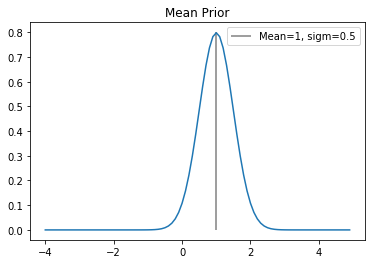

In [14]:
mean = np.arange(-4, 5, 0.1)

p_mean = scipy.stats.norm(1, 0.5).logpdf(mean)

plt.plot(mean, np.exp(p_mean))
plt.vlines(1, 0, 0.8, alpha=0.5, label="Mean=1, sigm=0.5")
plt.title("Mean Prior")
plt.legend()
plt.show()

## Amplitude (long kernel)

Our kernel modeling long-term changes in the profile of the lightcurve has a hyper-parameter for the amplitude. While we don't expect large changes in the amplitudes over time, we also didn't want to exclude any values (except for negative values) so we chose a prior with a peak at 2, and a large sigma.



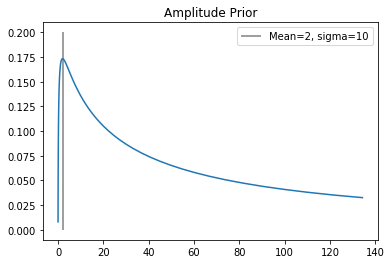

In [13]:
log_amp_l = np.arange(-5, 5, 0.1)

p_log_amp_k2 = scipy.stats.norm(np.log(2), np.log(10)).logpdf(log_amp_l)

plt.plot(np.exp(log_amp_l), np.exp(p_log_amp_k2))
plt.vlines(2, 0, 0.2, alpha=0.5, label="Mean=2, sigma=10")
plt.title("Amplitude Prior")
plt.legend()
plt.show()

## Metric (long kernel)

The metric hyper-parameter for the long-term kernel is expected to capture any gradual changes to the lightcurve profile over time, meaning that we want the average time to be quite long, as to discourage it from trying to fit for any short term changes, since those should be coming from the periodicity of the asteroid. 

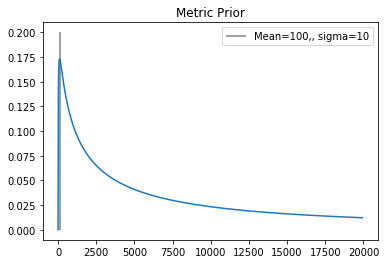

In [12]:
log_metric = np.arange(-5, 10, 0.1)

p_log_metric = scipy.stats.norm(np.log(100), np.log(10)).logpdf(log_metric)

plt.plot(np.exp(log_metric), np.exp(p_log_metric))
plt.vlines(100, 0, 0.2, alpha=0.5, label="Mean=100,, sigma=10")
plt.title("Metric Prior")
plt.legend()
plt.show()

## Amplitude (periodic)

The amplitude of the periodic kernel is expected to be similar to the difference in magnitude of the asteroid, while the other amplitude is meant to model more of the change in the mean of the amplitude over extended periods of time. The periodic amplitude is thus expected to vary by a few magnitudes potentially, but never anything extensive.



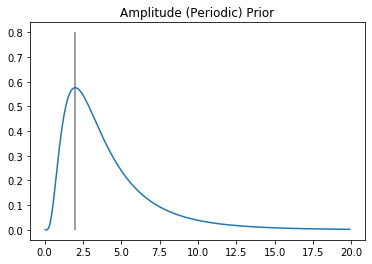

In [6]:
log_amp_p = np.arange(-3, 3, 0.01)

p_log_amp_k1 = scipy.stats.norm(np.log(2), np.log(2)).logpdf(log_amp_p)

plt.plot(np.exp(log_amp_p), np.exp(p_log_amp_k1))
plt.vlines(2, 0, 0.8, alpha=0.5, label="Mean=2, sigma=2")
plt.title("Amplitude (Periodic) Prior")
#plt.legend()
plt.show()

## Gamma

Gamma determines the length-scale of the variability of the asteroid profile. The smaller the value, the smoother the lightcurve is expected to look, versus a higher value for gamma indicates a lot of detail within the correlating period. 

If gamma becomes unusually large, it might be because the estimated period is capturing multiple period cycles, and is thus interpreting the lightcurve to be more complex than it actually is.

/home/christina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


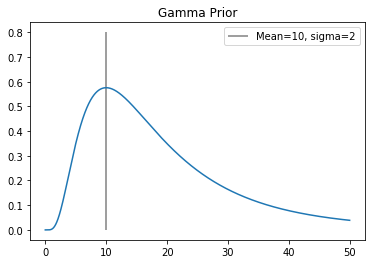

In [10]:
gamma = np.arange(0.0001 ,50, 0.01)

p_log_gamma = scipy.stats.norm(np.log(10), np.log(2)).logpdf(np.log(gamma))

plt.plot(gamma, np.exp(p_log_gamma))
plt.vlines(10, 0, 0.8, alpha=0.5, label="Mean=10, sigma=2")
plt.title("Gamma Prior")
plt.legend()
plt.show()

## Period

The period is the most anticipated parameter we are looking to fit. We know from previous detailed studies of asteroids what we would expect the general distribution of asteroid periods to look like, so we are replicating the general distribution here. Most asteroids you would expect to have a period within 24-48 hours, with little chance of a period being faster than 2 hours (although not impossible). 

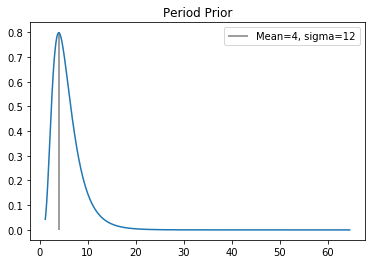

In [11]:
log_period = np.arange(-3, 1, 0.01)

p_log_period = scipy.stats.norm(np.log(4.0 / 24.0), (12.0 / 24.0)).logpdf(log_period)

plt.plot(np.exp(log_period)*24, np.exp(p_log_period))
plt.vlines(4, 0, 0.8, alpha=0.5, label="Mean=4, sigma=12")
plt.title("Period Prior")
plt.legend()
plt.show()